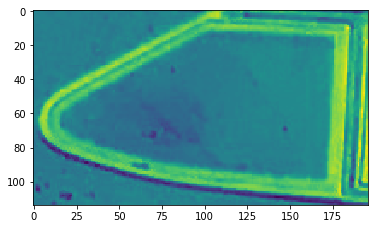

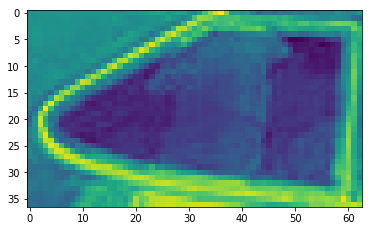

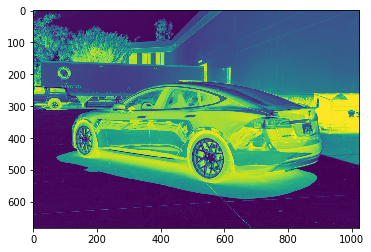

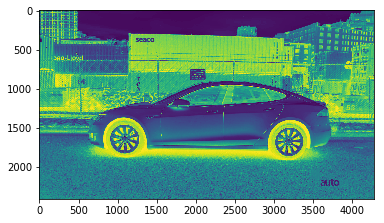

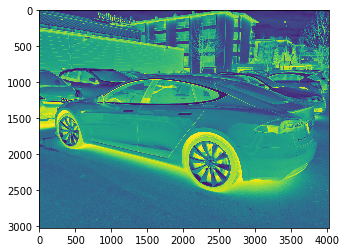

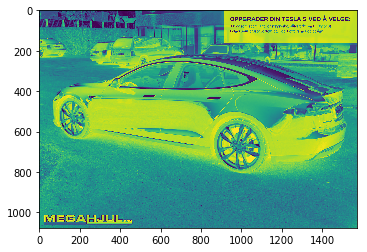

In [36]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


images = [cv2.imread('p3.jpg'),
          cv2.imread('p4.jpg'),
          cv2.imread('01.jpg'), 
          cv2.imread('02.jpg'), 
          cv2.imread('03.jpg'), 
          cv2.imread('04.jpg')]

def transform(img_rgb):
    return 255-img_rgb[:,:,2]

for im in images:
    plt.figure()
    plt.imshow(transform(im))


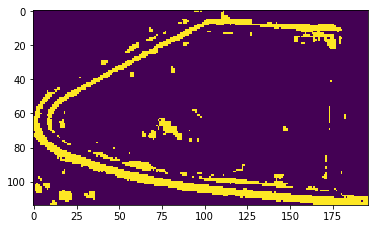

In [50]:
## Mask between thresholds

lower_red = np.array([0,60,50])
upper_red = np.array([255,200,255])

hsv = cv2.cvtColor(images[0], cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, lower_red, upper_red)
plt.imshow(mask)

[None, None, None, None, None, None, None, None]

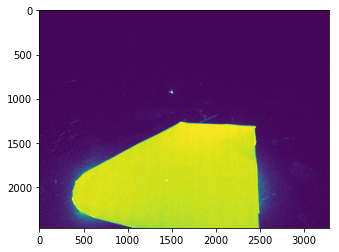

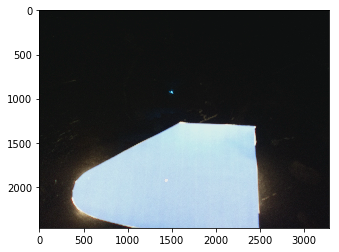

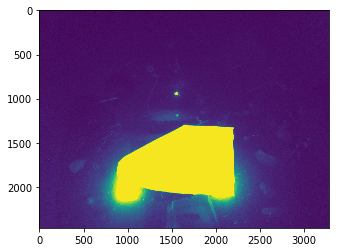

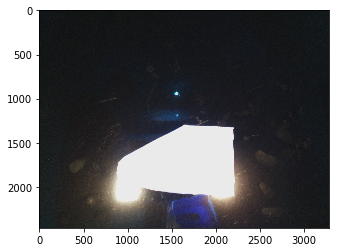

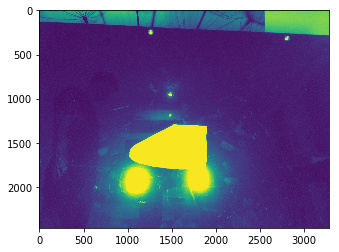

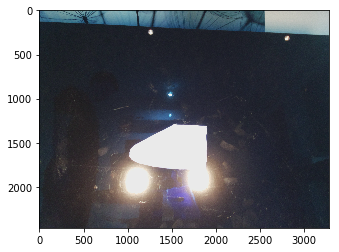

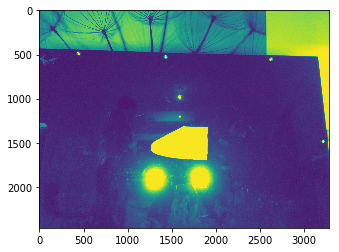

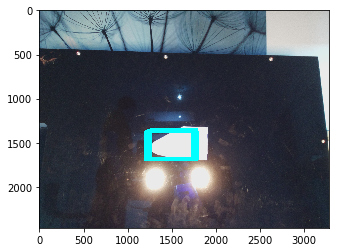

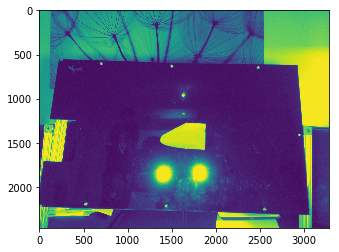

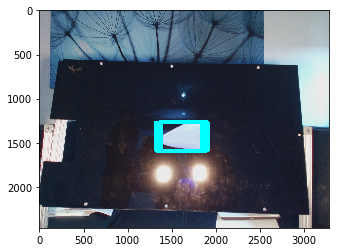

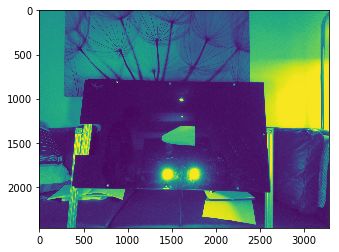

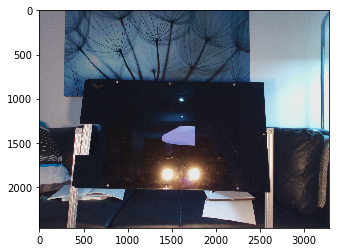

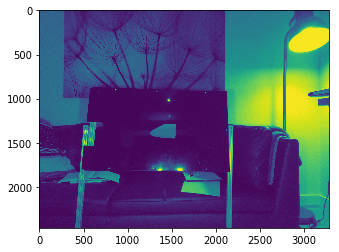

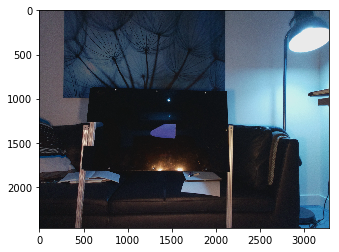

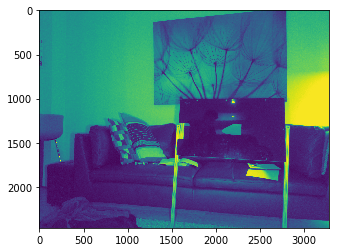

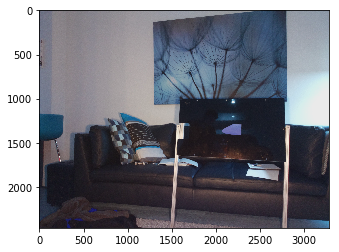

In [154]:
images = [cv2.imread('a/a' + str(i) + '.jpg') for i in range(0, 8)]
template = cv2.imread('a/p.jpg', 0)

def trans(img):
    # 201 229 236
    lower_red = np.array([180, 200, 230])
    upper_red = np.array([240, 254, 254])
    
    #hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(img, lower_red, upper_red)
    
    return mask

def fitMask(img, template):
    
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    plt.figure()
    plt.imshow(img_gray)
    
    w, h = template.shape[::-1]

    res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
    threshold = 0.75
    loc = np.where( res >= threshold)
    
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)

    plt.figure()
    plt.imshow(img)
    
[fitMask(i, template) for i in images]

https://stackoverflow.com/questions/7624765/converting-an-opencv-image-to-black-and-white

# Strategies

## Long range recognition

Strategy for calibration: 
- for a given car/setup take a picture from a typical operation distance
- crop out the port
- optimize graycale oversion to maximize contrast between port lid and chassis

For connecting:
- take picture
- perform calibrated grayscale conversion
- look for port in reuslting binary
- if present, get location and crop image arund this
- look for two known features of port
    - if not found, assume a false positive
    - if found, pass along to determine: distance to vehicle (distance between points), relative angle to vehicle (slope of line) of vehicle and of us with respect to vehicle (position of points in image)